In [1]:
import csv
import pandas as pd

In [7]:
desa_miskin = pd.read_excel('data/Desa Miskin Ekstrim 2022 Jawa Tengah.xlsx', sheet_name='JAWA TENGAH', header=2,
              names=['nama_provinsi', 'nama_kab', 'nama_kec', 'nama_desa'])
desa_miskin.head(3)

,nama_provinsi,nama_kab,nama_kec,nama_desa
0,JAWA TENGAH,BANYUMAS,LUMBIR,CINGEBUL
1,JAWA TENGAH,BANYUMAS,LUMBIR,KEDUNGGEDE
2,JAWA TENGAH,BANYUMAS,LUMBIR,CIDORA


In [6]:
desa_id = pd.read_csv('data/idwilayah.csv', dtype='str')
desa_id = desa_id[desa_id['nama_provinsi']=='JAWA TENGAH']
desa_id['nama_kab'] = desa_id['nama_kab'].str.replace('KAB. ', '')
desa_id.head(3)

C:\Users\niam\AppData\Local\Temp\ipykernel_23072\676098703.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  desa_id['nama_kab'] = desa_id['nama_kab'].str.replace('KAB. ', '')


,kode_prov,nama_provinsi,kode_kab,nama_kab,kode_kec,nama_kec,kdwilayah,nama_desa
31791,33,JAWA TENGAH,3301,CILACAP,3301010,DAYEUHLUHUR,3301010001,PANULISAN BARAT
31792,33,JAWA TENGAH,3301,CILACAP,3301010,DAYEUHLUHUR,3301010002,PANULISAN
31793,33,JAWA TENGAH,3301,CILACAP,3301010,DAYEUHLUHUR,3301010003,PANULISAN TIMUR


In [34]:
desa_miskin_id = desa_miskin.merge(desa_id, how='left', on=['nama_provinsi', 'nama_kab', 'nama_kec', 'nama_desa'])
desa_miskin_id

,nama_provinsi,nama_kab,nama_kec,nama_desa,kode_prov,kode_kab,kode_kec,kdwilayah
0,JAWA TENGAH,BANYUMAS,LUMBIR,CINGEBUL,33,3302,3302010,3302010001
1,JAWA TENGAH,BANYUMAS,LUMBIR,KEDUNGGEDE,33,3302,3302010,3302010002
2,JAWA TENGAH,BANYUMAS,LUMBIR,CIDORA,33,3302,3302010,3302010003
3,JAWA TENGAH,BANYUMAS,LUMBIR,BESUKI,33,3302,3302010,3302010004
4,JAWA TENGAH,BANYUMAS,LUMBIR,PARUNGKAMAL,33,3302,3302010,3302010005
...,...,...,...,...,...,...,...,...
5666,JAWA TENGAH,BREBES,BREBES,SIGAMBIR,33,3329,3329170,3329170019
5667,JAWA TENGAH,BREBES,BREBES,PAGEJUGAN,33,3329,3329170,3329170020
5668,JAWA TENGAH,BREBES,BREBES,KEDUNGUTER,33,3329,3329170,3329170021
5669,JAWA TENGAH,BREBES,BREBES,TENGKI,33,3329,3329170,3329170022


In [75]:
jml_base = desa_id['nama_kab'].value_counts().sort_index()
jml_base

BANJARNEGARA       278
BANYUMAS           331
BATANG             248
BLORA              295
BOYOLALI           300
BREBES             297
CILACAP            284
DEMAK              249
GROBOGAN           280
JEPARA             195
KARANGANYAR        177
KEBUMEN            460
KENDAL             286
KLATEN             401
KOTA MAGELANG       17
KOTA PEKALONGAN     27
KOTA SALATIGA       23
KOTA SEMARANG      177
KOTA SURAKARTA      51
KOTA TEGAL          27
KUDUS              132
MAGELANG           372
PATI               406
PEKALONGAN         285
PEMALANG           222
PURBALINGGA        239
PURWOREJO          494
REMBANG            294
SEMARANG           235
SRAGEN             208
SUKOHARJO          167
TEGAL              287
TEMANGGUNG         289
WONOGIRI           294
WONOSOBO           265
Name: nama_kab, dtype: int64

In [76]:
jml_miskin = desa_miskin_id['nama_kab'].value_counts().sort_index()
jml_miskin

BANJARNEGARA    217
BANYUMAS        309
BATANG          196
BLORA           216
BOYOLALI        192
BREBES          242
DEMAK           218
GROBOGAN        234
JEPARA          174
KARANGANYAR     154
KEBUMEN         277
KENDAL          236
KLATEN          304
KUDUS           101
MAGELANG        220
PATI            336
PEKALONGAN      229
PEMALANG        201
PURBALINGGA     227
REMBANG         151
SEMARANG        161
SRAGEN          204
SUKOHARJO       143
TEGAL           276
TEMANGGUNG      106
WONOGIRI        144
WONOSOBO        203
Name: nama_kab, dtype: int64

In [94]:
desa_miskin_base = pd.concat([jml_base, jml_miskin], axis=1).reset_index()
desa_miskin_base = desa_miskin_base.set_axis(['nama_kab', 'jml_desa', 'jml_desa_miskin'], axis='columns')

In [95]:
desa_miskin_base

,nama_kab,jml_desa,jml_desa_miskin
0,BANJARNEGARA,278,217.0
1,BANYUMAS,331,309.0
2,BATANG,248,196.0
3,BLORA,295,216.0
4,BOYOLALI,300,192.0
5,BREBES,297,242.0
6,CILACAP,284,NaN
7,DEMAK,249,218.0
8,GROBOGAN,280,234.0
9,JEPARA,195,174.0


In [99]:
desa_miskin_base = desa_miskin_base[desa_miskin_base['jml_desa_miskin'].notna()]

In [101]:
desa_miskin_base['pct_desa_miskin'] = desa_miskin_base['jml_desa_miskin']/desa_miskin_base['jml_desa'] 

C:\Users\niam\AppData\Local\Temp\ipykernel_23072\807785107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desa_miskin_base['pct_desa_miskin'] = desa_miskin_base['jml_desa_miskin']/desa_miskin_base['jml_desa']


In [118]:
desa_miskin_base.sort_values('pct_desa_miskin', ascending=False)

,nama_kab,jml_desa,jml_desa_miskin,pct_desa_miskin
29,SRAGEN,208,204.0,0.980769
31,TEGAL,287,276.0,0.961672
25,PURBALINGGA,239,227.0,0.949791
1,BANYUMAS,331,309.0,0.933535
24,PEMALANG,222,201.0,0.905405
9,JEPARA,195,174.0,0.892308
7,DEMAK,249,218.0,0.875502
10,KARANGANYAR,177,154.0,0.870056
30,SUKOHARJO,167,143.0,0.856287
8,GROBOGAN,280,234.0,0.835714


In [117]:
desa_miskin_base['pct_desa_miskin'].describe()

count    27.000000
mean      0.770866
std       0.153052
min       0.366782
25%       0.708655
50%       0.803509
75%       0.872779
max       0.980769
Name: pct_desa_miskin, dtype: float64

In [ ]:
desa_miskin_base.sort_values('pct_desa_miskin', ascending=False).to_csv('data/jumlah desa miskin by kab.csv')

<AxesSubplot:ylabel='nama_kab'>

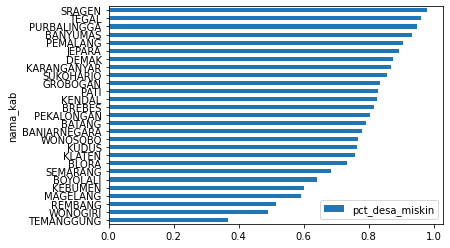

In [115]:
desa_miskin_base.sort_values('pct_desa_miskin', ascending=True).plot.barh(x='nama_kab', y='pct_desa_miskin')

<AxesSubplot:xlabel='jml_desa', ylabel='jml_desa_miskin'>

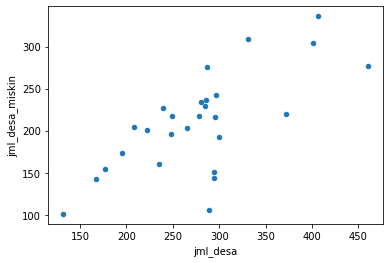

In [119]:
desa_miskin_base.plot.scatter(x='jml_desa', y='jml_desa_miskin')